In [2]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [5]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('dataset/2016 School Explorer.csv')
shsat = pd.read_csv('dataset/D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('dataset/2010-2016-school-safety-report.csv')

In [11]:
df.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [16]:
sorted(list(df.columns))

['Address (Full)',
 'Adjusted Grade',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'City',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Community School?',
 'District',
 'Economic Need Index',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All Students',
 'Grade 3 ELA 4s - American Indian or Alaska Native',
 'Grade 3 ELA 4s - Asian or Pacific Islander',
 'Grade 3 ELA 4s - Black or African American',
 'Grade 3 ELA 4s - Economically Disadvantaged',
 'Grade 3 ELA 4s - Hispanic or Latino',
 'Grade 3 ELA 4s - Limited English Proficient',
 'Grade 3 ELA 4s - Multiracial',
 'Grade 3 ELA 4s - White',
 'Grade 3 Math - All Students tested',
 'Grade 3 Math 4s - All Students',
 'Grade 3 Math 4s - American Indian or Alaska Native',
 'Grade 3 Math 4s - Asian or Pacific Islander',
 'Grade 3 Math 4s - Black or African American',
 'Grade 3 Math 4s - Economically Disadvantaged',
 'Grade 3 M

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [18]:
#df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].astype(str).apply(p2f)

In [19]:
#df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)

In [12]:
# preprocess data

def p2f(x):
    """ function to convert the percentage to a fraction."""
    return float(x.strip('%'))/100

In [22]:
def apply_multiple_columns(dataframe, col_names, function):
    """ function to apply function to all col_names in the dataframe"""
    for name in col_names:
        dataframe[name] = dataframe[name].astype(str).apply(function)
    return dataframe

In [25]:
col_names = ['Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %','Trust %', 'Student Attendance Rate']

In [26]:
df = apply_multiple_columns(df, col_names, p2f)

In [28]:
df.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [29]:
df['School Income Estimate'].unique()

array(['$31,141.72 ', '$56,462.88 ', '$44,342.61 ', '$31,454.00 ',
       '$46,435.59 ', '$39,415.45 ', '$43,706.73 ', '$28,820.67 ',
       '$34,889.24 ', '$35,545.10 ', '$40,809.90 ', '$27,881.59 ', nan,
       '$63,760.00 ', '$62,519.57 ', '$57,504.48 ', '$56,787.20 ',
       '$76,833.96 ', '$32,817.79 ', '$26,114.78 ', '$103,399.19 ',
       '$144,270.13 ', '$98,455.77 ', '$88,011.14 ', '$102,421.46 ',
       '$115,909.89 ', '$91,149.35 ', '$116,235.64 ', '$105,947.71 ',
       '$181,382.06 ', '$70,970.41 ', '$96,174.16 ', '$42,493.71 ',
       '$38,919.61 ', '$59,851.21 ', '$132,795.44 ', '$81,690.71 ',
       '$94,194.68 ', '$104,700.89 ', '$81,932.76 ', '$85,295.72 ',
       '$93,388.06 ', '$58,096.58 ', '$176,793.40 ', '$115,262.92 ',
       '$140,085.12 ', '$107,878.64 ', '$118,322.46 ', '$51,287.22 ',
       '$143,926.53 ', '$56,095.12 ', '$87,424.06 ', '$95,312.63 ',
       '$56,614.57 ', '$39,051.13 ', '$64,633.18 ', '$111,115.15 ',
       '$44,727.39 ', '$37,110.83 ', '$64

In [30]:
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',','')
df['School Income Estimate'] = df['School Income Estimate'].str.replace('$','')
df['School Income Estimate'] = df['School Income Estimate'].str.replace(' ','')
df['School Income Estimate'] = df['School Income Estimate'].astype(float)

In [31]:
df['School Income Estimate'] = df['School Income Estimate'].fillna(0)
df['Economic Need Index'] = df['Economic Need Index'].fillna(0)

In [33]:
df['School Income Estimate'].unique()

array([  31141.72,   56462.88,   44342.61,   31454.  ,   46435.59,
         39415.45,   43706.73,   28820.67,   34889.24,   35545.1 ,
         40809.9 ,   27881.59,       0.  ,   63760.  ,   62519.57,
         57504.48,   56787.2 ,   76833.96,   32817.79,   26114.78,
        103399.19,  144270.13,   98455.77,   88011.14,  102421.46,
        115909.89,   91149.35,  116235.64,  105947.71,  181382.06,
         70970.41,   96174.16,   42493.71,   38919.61,   59851.21,
        132795.44,   81690.71,   94194.68,  104700.89,   81932.76,
         85295.72,   93388.06,   58096.58,  176793.4 ,  115262.92,
        140085.12,  107878.64,  118322.46,   51287.22,  143926.53,
         56095.12,   87424.06,   95312.63,   56614.57,   39051.13,
         64633.18,  111115.15,   44727.39,   37110.83,   64272.58,
         48783.74,   98595.22,   51468.6 ,   63947.38,  115897.33,
         30321.85,   44126.71,   38655.2 ,   72112.72,   89026.73,
        102963.37,   76791.47,   24553.59,   48431.58,   28310

In [34]:
data_eco = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Economic Need Index'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
    }
]

In [36]:
layout = go.Layout(
    title='New York School Population (Economic Need Index)',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'))

In [37]:
fig = go.Figure(data=data_eco, layout=layout)
iplot(fig, filename='scatter_hover_labels_eco_index')

In [40]:
col_names_1 = ['Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent White', 'Percent Black / Hispanic']

In [41]:
df = apply_multiple_columns(df, col_names_1, p2f)

In [45]:
data_black = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Percent Black'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
    }
]

layout = go.Layout( title='New York Black Student Ratio of School',
                  xaxis=dict(title='Longitude'),
                  yaxis=dict(title='Latitude'))
fig = go.Figure(data=data_black, layout=layout)
iplot(fig, filename='scatter_hover_labels_black_ratio')

In [46]:
data_his = [
    {
        'x': df['Longitude'],
        'y': df['Latitude'],
        'text': df['School Name'],
        'mode': 'markers',
        'marker': {
            'color': df['Percent Hispanic'],
            'size': df['School Income Estimate']/4500,
            'showscale': True,
            'colorscale': 'Portland'
        }
        
    }
]

layout = go.Layout(
    title='New York Hispanic Student Ratio of School',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude'))

fig = go.Figure(data=data_his, layout=layout)
iplot(fig, filename='scatter_hover_labels_hispanic_ratio')


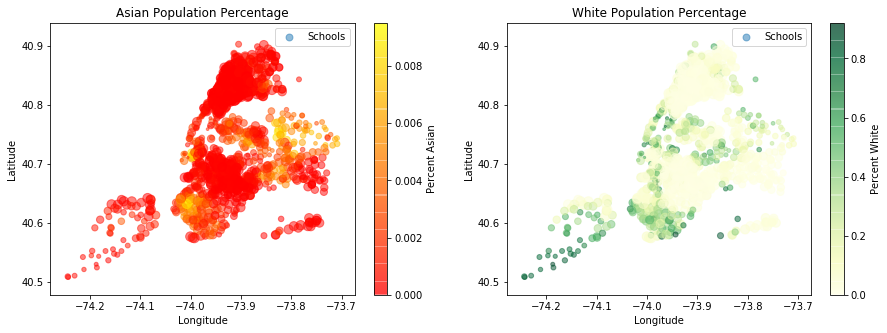

In [61]:
# set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[0],
       s=df['Economic Need Index']*100, c='Percent Asian', label='Schools',
       title='Asian Population Percentage', colorbar=True, alpha=0.5,
       figsize=(15,5), colormap='autumn')
df.plot(kind='scatter', x='Longitude', y='Latitude', ax=axes[1],
       s=df['Economic Need Index']*100, c='Percent White', label='Schools',
       title='White Population Percentage', colorbar=True, alpha=0.5,
       figsize=(15,5), colormap='YlGn')
plt.legend()
plt.show()

C:\Users\shashwat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0,0.5,'Employee Count')

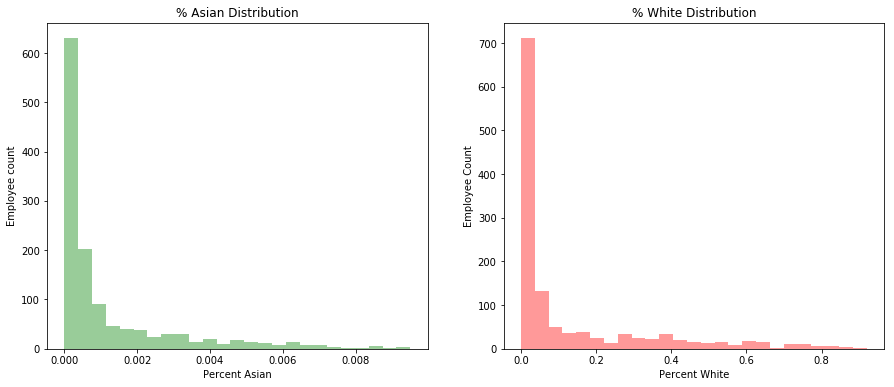

In [67]:
# White and Asian Distribution

# setting up matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Asian'], kde=False, color='g',
             ax=axes[0], bins=25).set_title('% Asian Distribution')
axes[0].set_ylabel('Employee count')

# Graph Employee Evalutation
sns.distplot(df['Percent White'], kde=False, color='r',
             ax=axes[1], bins=25).set_title('% White Distribution')
axes[1].set_ylabel('Employee Count')

C:\Users\shashwat\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0,0.5,'Employee Count')

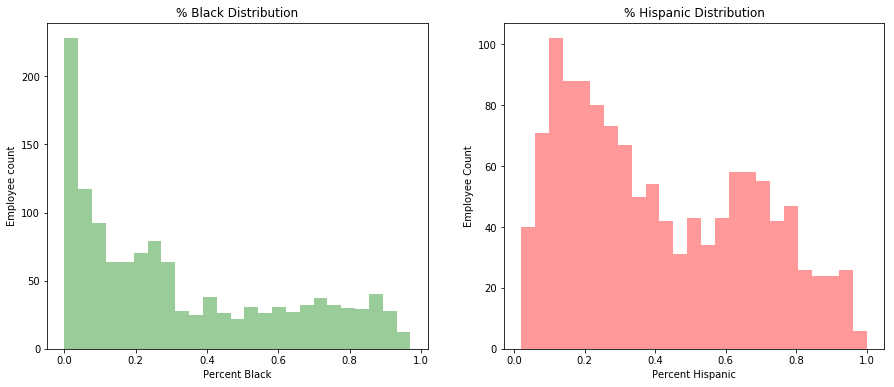

In [69]:
# Black and Hispanic Distribution

# setting up matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['Percent Black'], kde=False, color='g',
             ax=axes[0], bins=25).set_title('% Black Distribution')
axes[0].set_ylabel('Employee count')

# Graph Employee Evalutation
sns.distplot(df['Percent Hispanic'], kde=False, color='r',
             ax=axes[1], bins=25).set_title('% Hispanic Distribution')
axes[1].set_ylabel('Employee Count')

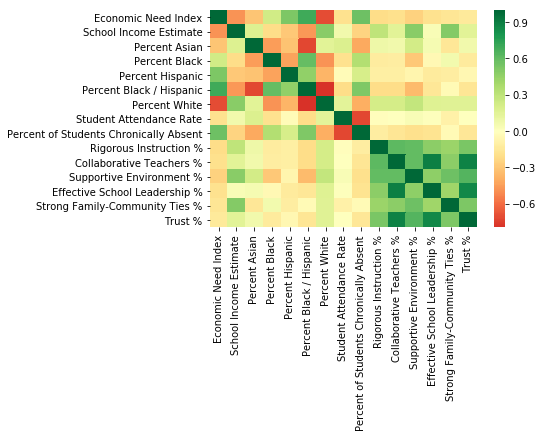

In [71]:
df2 = df.iloc[:, [16,17,19,20,21,22,23,24,25,26,28,30,32,34,36]]

# Correlation Matrix
corr = df2.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values,
                  yticklabels=corr.columns.values,
                  cmap='RdYlGn', center=0)

Text(0.5,1,'Economic Need Index (Black)')

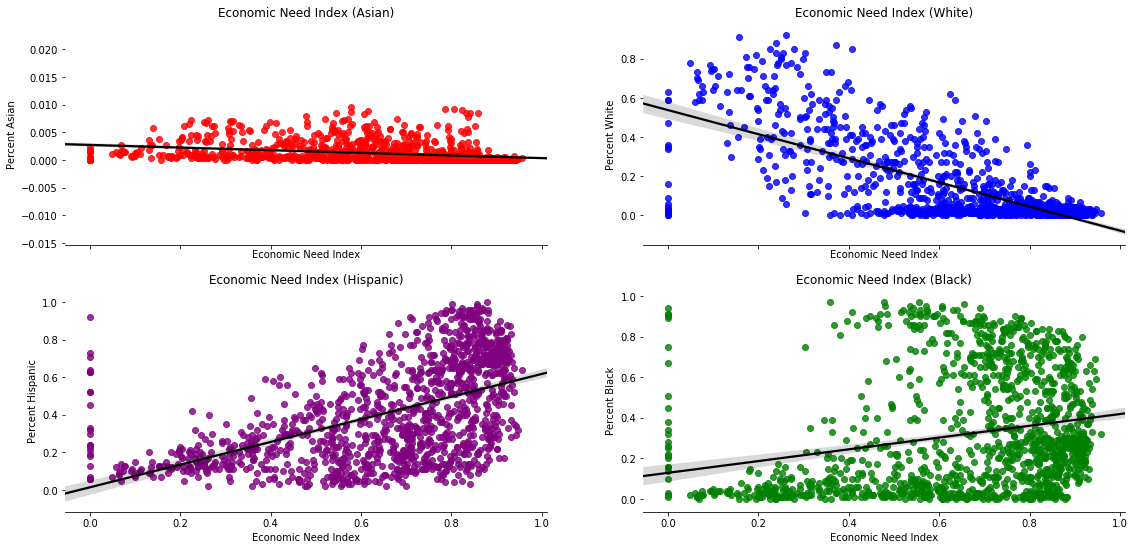

In [75]:
f, axes = plt.subplots(2, 2, figsize=(19,9), sharex=True)
sns.despine(left=True)

sns.regplot(x=df['Economic Need Index'], y=df['Percent Asian'],
           color='red', ax=axes[0,0], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent White'],
           color='blue', ax=axes[0,1], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent Hispanic'],
           color='purple', ax=axes[1,0], line_kws={'color':'black'})
sns.regplot(x=df['Economic Need Index'], y=df['Percent Black'],
           color='g', ax=axes[1,1], line_kws={'color':'black'})

axes[0,0].set_title('Economic Need Index (Asian)')
axes[0,1].set_title('Economic Need Index (White)')
axes[1,0].set_title('Economic Need Index (Hispanic)')
axes[1,1].set_title('Economic Need Index (Black)')